# UTP PPM 2024
---------------
# KNN

Tuliskan Nama, NIM, dan kelas Anda:

Nama  : Ahmad Zaki

NIM   : 225150201111025

Kelas : PPM-D

# Import Dependencies

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dataset

Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

Link alternatif: https://drive.google.com/file/d/1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV/view

In [32]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV' -O winequality-red.csv

--2024-04-07 09:39:50--  https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV
Resolving docs.google.com (docs.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV&export=download [following]
--2024-04-07 09:39:50--  https://drive.usercontent.google.com/download?id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:811::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [application/octet-stream]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.03s   



In [33]:
data = pd.read_csv('winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
# Data information and check for missing values
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu dilakukan imputasi atau metode penanganan nilai yang hilang lainnya.

# Pre-proses Data

Lakukan reduksi data melalui downsampling untuk memperpendek proses pelatihan dan pengujian model.

In [35]:
# Reduce the number data
def random_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=0)
reduced_data = random_sampling(data, 500)

Lakukan normalisasi data kecuali kolom quality sebagai kolom label dengan menggunakan z-score.

In [36]:
# Z-score normalization except for the quality column
def z_score(data):
    # Exclude the 'quality' column from normalization
    columns_to_normalize = data.columns[data.columns != 'quality']

    # Normalized data initialization
    normalized_data = data.copy()

    normalized_data[columns_to_normalize] = (normalized_data[columns_to_normalize] - data[columns_to_normalize].mean()) / data[columns_to_normalize].std()
    return normalized_data

normalized_data = z_score(reduced_data)
normalized_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,1.478894,-0.316620,0.839736,-0.342617,2.080887,1.247433,0.721623,0.787516,-0.949976,0.669567,0.326500,6
1032,-0.090687,1.829335,-1.382061,1.340176,0.200821,-1.034963,-1.029072,0.968922,0.280060,-0.797104,-0.799686,5
1002,0.490639,-1.420254,0.323039,-0.384686,-0.590786,-0.205001,-0.591398,-0.834468,-0.367327,1.179714,1.171140,7
487,1.130098,0.756357,0.478048,-0.595036,-0.838163,-1.034963,-1.029072,0.787516,-0.949976,-1.498556,-0.424291,6
979,2.292751,-0.439246,1.149754,-0.931594,-0.293934,-1.242453,-1.298410,0.093904,-1.208930,-0.159421,-0.048895,5


# Model

Buatlah sebuah fungsi perhitungan jarak menggunakan rumus Chebyshev, Euclidean, Manhattan yang memiliki parameter data1 dan data2 dalam bentuk float, dan distance_type dalam bentuk string.

In [37]:
# Distance Function (chebyshev, euclidean, manhattan)

def chebyshev(data1, data2):
    return max(abs(data1 - data2))
def euclidean(data1, data2):
    return np.sqrt(np.sum((data1 - data2) ** 2))
def manhattan(data1, data2):
    return np.sum(np.abs(data1 - data2))


def calculate_distance(data1, data2, distance_type):
    if distance_type == 'chebyshev':
        return chebyshev(data1, data2)
    elif distance_type == 'euclidean':
        return euclidean(data1, data2)
    elif distance_type == 'manhattan':
        return manhattan(data1, data2)
    else:
        return None

Simpan label dataset yang dinormalisasi ke dalam variabel yang disebut "label".

In [38]:
label = normalized_data[normalized_data.columns[-1]]
label

1109    6
1032    5
1002    7
487     6
979     5
       ..
831     6
1437    5
620     5
465     5
748     6
Name: quality, Length: 500, dtype: int64


Bagi dataset yang dinormalisasi menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [39]:
train_data, test_data, train_label, test_label = train_test_split(normalized_data[normalized_data.columns[:-1]], label, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(400, 11)
(100, 11)


Buatlah sebuah fungsi algoritma KNN untuk melakukan prediksi menggunakan parameter train_data, train_label, test_data, k sebagai bilangan bulat, dan distance_type sebagai string.

In [40]:
def knn(train_data, train_label, test_data, k, distance_type):
    predictions = []

    for i in range(len(test_data)):
        distances = []
        for j in range(len(train_data)):
            dist = calculate_distance(test_data.iloc[i], train_data.iloc[j], distance_type)
            distances.append((dist, train_label.iloc[j]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        class_counter = Counter([neighbor[1] for neighbor in neighbors])
        prediction = class_counter.most_common(1)[0][0]
        predictions.append(prediction)

    return predictions

def knn_multi(train_data, train_label, test_data, k, distance_type):
    predictions = []

    for i in range(len(test_data)):
        distances = []
        for j in range(len(train_data)):
            dist = calculate_distance(test_data.iloc[i], train_data.iloc[j], distance_type)
            distances.append((dist, train_label.iloc[j]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        class_counter = Counter([neighbor[1] for neighbor in neighbors])
        prediction = class_counter.most_common(1)[0][0]
        predictions.append(prediction)

    return predictions

Temukan nilai k terbaik dengan mengamati hasil akurasi untuk setiap nilai k yang berbeda dan berbagai metode perhitungan jarak yang berbeda.

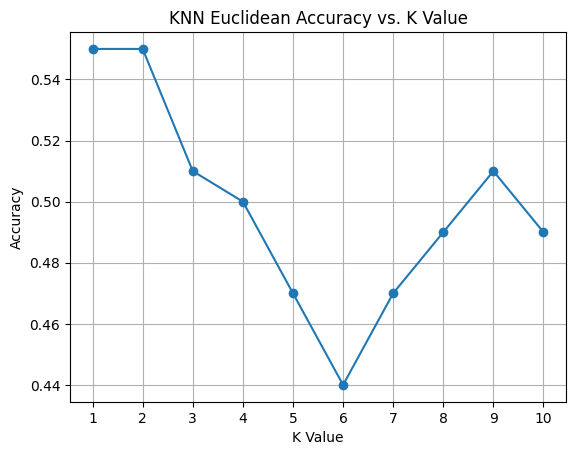

In [41]:
# Find best k for euclidean KNN

# Initialize empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test
k_range = range(1, 11)

# Iterate over each k value
for k in k_range:
    # Make predictions using the KNN model
    predictions = knn_multi(train_data, train_label, test_data, k, 'euclidean')
    # Calculate accuracy
    accuracy = accuracy_score(test_label, predictions)
    # Append k and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Euclidean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

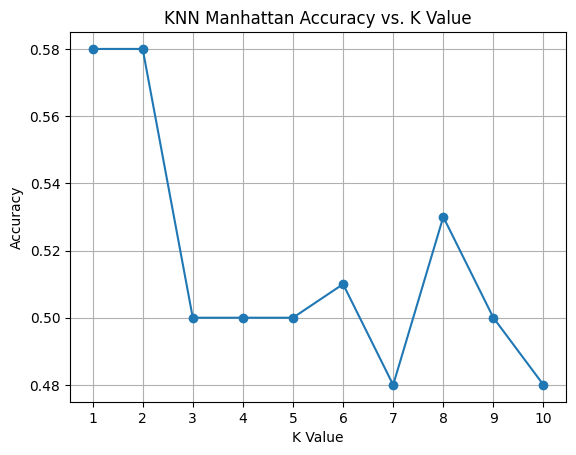

In [42]:
# Find best k for Manhattan KNN

# Initialize empty lists to store k values and corresponding accuracies
k_values_manhattan = []
accuracies_manhattan = []

# Define a range of k values to test
k_range_manhattan = range(1, 11)

# Iterate over each k value
for k in k_range_manhattan:
    # Make predictions using the KNN model with Manhattan distance
    predictions_manhattan = knn_multi(train_data, train_label, test_data, k, 'manhattan')
    # Calculate accuracy
    accuracy_manhattan = accuracy_score(test_label, predictions_manhattan)
    # Append k and accuracy to lists
    k_values_manhattan.append(k)
    accuracies_manhattan.append(accuracy_manhattan)

# Plot the graph for Manhattan KNN
plt.plot(k_values_manhattan, accuracies_manhattan, marker='o')
plt.title('KNN Manhattan Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values_manhattan)
plt.grid(True)
plt.show()

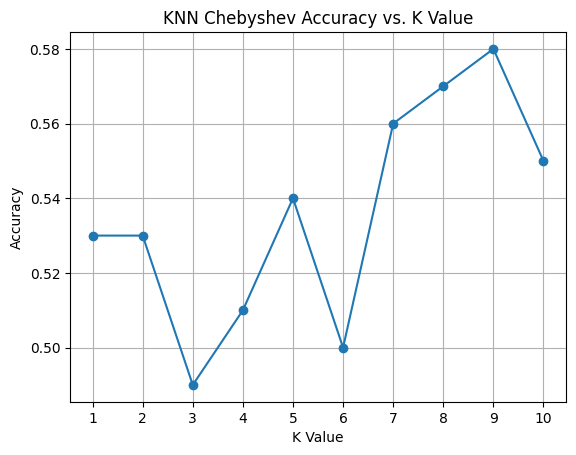

In [43]:
# Find best k for chebyshev KNN

# Initialize empty lists to store k values and corresponding accuracies
k_values_chebyshev = []
accuracies_chebyshev = []

# Define a range of k values to test
k_range_chebyshev = range(1, 11)

# Iterate over each k value
for k in k_range_chebyshev:
    # Make predictions using the KNN model with Chebyshev distance
    predictions_chebyshev = knn_multi(train_data, train_label, test_data, k, 'chebyshev')
    # Calculate accuracy
    accuracy_chebyshev = accuracy_score(test_label, predictions_chebyshev)
    # Append k and accuracy to lists
    k_values_chebyshev.append(k)
    accuracies_chebyshev.append(accuracy_chebyshev)

# Plot the graph for Chebyshev KNN
plt.plot(k_values_chebyshev, accuracies_chebyshev, marker='o')
plt.title('KNN Chebyshev Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values_chebyshev)
plt.grid(True)
plt.show()

# Evaluasi

Cetak hasil akurasi prediksi untuk setiap KNN dengan nilai k terbaik dan rumus perhitungan jarak yang berbeda

In [44]:
# predictions = knn_multi(train_data, train_label, test_data, k, 'euclidean')

# Predict using euclidean KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, k_range[np.argmax(accuracies)],'euclidean')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy (Euclidean):", accuracy)

Accuracy (Euclidean): 0.55


In [45]:
# Predict using Manhattan KNN with the best k value
predictions_manhattan = knn_multi(train_data, train_label, test_data, k_range_manhattan[np.argmax(accuracies_manhattan)],'manhattan')
accuracy_manhattan = accuracy_score(test_label, predictions_manhattan)
print("Accuracy (Manhattan):", accuracy_manhattan)

Accuracy (Manhattan): 0.58


In [46]:
# Predict using chebyshev KNN with the best k value
predictions_chebyshev = knn_multi(train_data, train_label, test_data, k_range_chebyshev[np.argmax(accuracies_chebyshev)],'chebyshev')
accuracy_chebyshev = accuracy_score(test_label, predictions_chebyshev)
print("Accuracy (Chebyshev):", accuracy_chebyshev)

Accuracy (Chebyshev): 0.58


# Kesimpulan

Soal

1. Jelaskan pengaruh k yang rendah ataupun tinggi terhadap akurasi hasil algoritma KNN!
2. Jelaskan pengaruh perbedaan rumus perhitungan jarak yang digunakan terhadap hasil akurasi algoritma KNN!
3. Jelaskan dan sebutkan berapa jumlah k ideal dan apa rumus perhitungan jarak yang menghasilkan akurasi terbaik pada praktikum ini!

Jawaban


1.   Jika nilai k terlalu rendah, model cenderung mudah dipengaruhi oleh noise atau outlier. Lalu model juga cenderung mengikuti variasi yang lebih kecil dalam data pelatihan, yang dapat menghasilkan prediksi yang tidak stabil atau bervariasi terlalu banyak tetapi nilai k rendah ini juga lebih sensitif terhadap data terdekat, jadi memungkinkan untuk menangkap pola lokal yang lebih detail dan mengurangi kemungkinan overfitting.

  Jika nilai k terlalu tinggi model cenderung lebih stabil dan kurang sensitif terhadap noise karena mempertimbangkan lebih banyak tetangga terdekat dalam proses pengambilan keputusan. Lalu model juga dapat kehilangan kemampuannya untuk menangkap pola lokal dan lebih rentan terhadap overfitting, di mana model terlalu fokus pada data latih dan tidak dapat digeneralisasi dengan baik.
---
2.   Penggunaan rumus jarak yang berbeda dapat menghasilkan pola kedekatan yang berbeda antara titik data, sehingga mempengaruhi keputusan model dalam memprediksi label untuk data uji. Pemilihan rumus jarak terbaik biasanya tergantung pada jenis datanya (numerik, kategorikal, dll), distribusi data, dan skala data.

*   Euclidean Distance: Mengukur jarak "garis lurus" antara dua titik. Bekerja dengan baik pada data numerik yang terdistribusi normal dan mengasumsikan bahwa semua fitur berkontribusi secara merata terhadap kesamaan.
*    Manhattan Distance: Mengukur jarak sebagai total perbedaan antara koordinat dalam setiap dimensi. Cocok untuk data yang memiliki dimensi yang berbeda-beda atau Lebih sensitif terhadap perubahan kecil dalam data dan dapat membantu pada data kategorikal.
*   Chebyshev Distance: Mengukur jarak sebagai perbedaan absolut antara setiap koordinat. Cocok untuk data yang memiliki dimensi yang berbeda dan di mana setiap dimensi memiliki pengaruh yang sama pentingnya. Lebih sensitif terhadap outlier dan dapat membantu pada data dengan skala yang berbeda.
---
3.   Dalam praktikum ini, setelah melakukan eksperimen dan evaluasi, jumlah k ideal adalah 1 dan 2 untuk metode Euclidean, untuk metode manhattan juga k= 1 dan k=2, untuk metode chebyshev k=9 dan metode perhitungan jarak yang menghasilkan akurasi terbaik adalah Manhattan dan Chebyshev dengan akurasi sebesar 58%.

  Chebyshev lebih sensitif terhadap outlider dibandingkan dengan Euclidean, sehingga dapat memberikan hasil yang lebih akurat pada data yang lumayan noisy. Manhattan lebih sensitif terhadap perubahan kecil dibandingkan dengan euclidean, sehingga dapat memberikan hasil yang lebih akurat dengan skala yang berbeda.
